# model test

## Tensorized

In [1]:
def my_func():
    a = 1
    b = 2
    c = 3
    return (a,b),c

x = my_func()
print(x)
y1, _ = my_func()
print(y1)
z1, z2, z3 = my_func()
print(z1,z2,z3)
    

((1, 2), 3)
(1, 2)


ValueError: not enough values to unpack (expected 3, got 2)

In [8]:
import ast

temp = '{0 : 1,100 : 2,200 : 3}'
temp_list = ast.literal_eval(temp)

print(type(temp_list))
print(temp_list)

<class 'dict'>
{0: 1, 100: 2, 200: 3}


<Figure size 640x480 with 0 Axes>

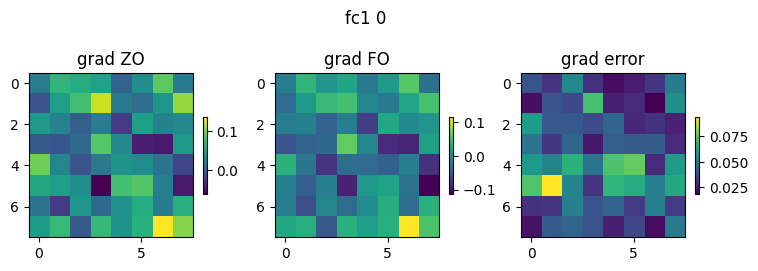

ValueError: cannot reshape array of size 448 into shape (21)

In [25]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

optimizer_name = 'ZO_SCD_esti'
h_smooth = 0.008

grads_path=os.path.join('./figs/' + optimizer_name + '/h_'+str(h_smooth)+'.pth')

grads = torch.load(grads_path)

grads_zo = grads[0]
grads_fo = grads[1]
grads_err = grads[2]

for layer_name, layer in grads_zo.items():
    for p_name, p in layer.items():
        size_x = int(np.sqrt(len(p)))
        # size_y = int(p.numel()/size_x)
        grad_zo = np.reshape(grads_zo[layer_name][p_name].cpu().numpy(), (-1, size_x))
        grad_zo = grads_zo[layer_name][p_name].cpu().numpy().reshape((size_x,-1))
        grad_fo = grads_fo[layer_name][p_name].cpu().numpy().reshape((size_x,-1))
        grad_err = grads_err[layer_name][p_name].cpu().numpy().reshape((size_x,-1))

        fig = plt.figure()
        fig, axs = plt.subplots(1, 3, figsize=(9, 3))

        # Plot matrices on subplots
        for ax, mat in zip(axs.flat, [grad_zo, grad_fo, grad_err]):
            im = ax.imshow(mat, cmap='viridis')
            fig.colorbar(im, ax=ax, shrink=1.0/axs.shape[0])

        # Add titles to subplots
        for ax, title in zip(axs.flat, ['grad ZO', 'grad FO', 'grad error']):
            ax.set_title(title)

        fig.suptitle(layer_name+' '+p_name)
        plt.show()

# single fig
# grad_zo = grads_zo['fc1']['0'].cpu().numpy().reshape((8,8))
# grad_fo = grads_fo['fc1']['0'].cpu().numpy().reshape((8,8))
# grad_err = grads_err['fc1']['0'].cpu().numpy().reshape((8,8))

# fig = plt.figure()
# fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# # Plot matrices on subplots
# for ax, mat in zip(axs.flat, [grad_zo, grad_fo, grad_err]):
#     im = ax.imshow(mat, cmap='viridis')
#     fig.colorbar(im, ax=ax, shrink=1.0/axs.shape[0])

# # Add titles to subplots
# for ax, title in zip(axs.flat, ['grad ZO', 'grad FO', 'grad error']):
#     ax.set_title(title)

# fig.suptitle('fc1 tt-core 0')
# plt.show()